# Clustering Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting clustering on Twitter data. 

In [1]:
import trt_API.process as proc
import trt_API.analysis as ana
import trt_API.clustering as cluster
import trt_API.org_research as org 
import matplotlib as plt
import datetime
from sklearn.feature_extraction import text 

SORTED = False

[nltk_data] Downloading package wordnet to /Users/rajuy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## PREPROCESSING

### Variables for Analysis

In [2]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False

### Load Tweet and Generate Dataframe

In [3]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
encoding = False
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH, encoding)

Initial size: 16042
Dropping duplicates...
Final size: 10472


### Extract Potential Cashtags

In [4]:
ctdf = proc.extractPossibleCashtags(df)
ctdf

Total potential Cashtags: 25


""


### Removing Noisy Tweets

In [5]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
words = open('../resources/stop_words.csv').read().split(",")
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)
cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']
cldf['tweet'] = cldf['original_tweet']
del cldf['original_tweet']
cldf[:100]

Removed 0 noisy terms.


<ipython-input-5-e6a76ca186c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']


,date,followers,username,location,tweet
0,Jun 01 20:02:51 2018\t0,88,Yohanan_L,France,1002641647736377346
1,Jun 01 22:19:01 2018\t0,464,Kiakkye30,Haiti,1002675915221098496
2,Jun 08 00:04:48 2018\t0,1019,KessprdGB,None,1004876863670374401
3,Jun 08 03:27:48 2018\t0,24,quynhnguyen153,None,1004927950293045248
4,Jun 08 07:44:53 2018\t0,1,mlqbuot27,"กรุงเทพมหานคร, ประเทศไทย",1004992647411298310
...,...,...,...,...,...
136,Jun 11 10:31:58 2018\t0,208,JuNe_0621,Thailand,1006121858918305792
137,Jun 11 10:32:45 2018\t0,10,7im_mi7,None,1006122056029618176
138,Jun 11 11:01:28 2018\t0,10,tangsundae,None,1006129282827948033
139,Jun 11 13:41:43 2018\t0,195,smile_wangGOT7,ในใจพี่แจ็คสัน😍,1006169611081928704


### Remove Retweets

In [6]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)


Removed 3 duplicates.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


In [7]:
print(cldf_no_RT.shape[0])

10469


## SPLITTING DATA

### By date

In [8]:
cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)
begin = datetime.datetime(2017,8,1,0,00) #year, month, day, hour, minute
end = datetime.datetime(2019,2,24,23,59)
specific_range_cldf = cldf[cldf.date > begin]
specific_range_cldf = specific_range_cldf[specific_range_cldf.date < end]

### By terms

In [9]:
terms_of_interest = ["climate"]
bsdf = proc.findTerms(specific_range_cldf, terms_of_interest)
bsdf

Found 0 terms of interest.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


,date,followers,username,location,tweet,RT


## CLUSTERING

In [10]:
'''
*** Enter additional stop words here.
*** This will ignore the words rather than removing tweets as with noisy Tweets.
'''
ADDITIONAL_STOP_WORDS = []
stop_words = text.ENGLISH_STOP_WORDS.union(org.STOP_WORDS)
stop_words = stop_words.union(ADDITIONAL_STOP_WORDS)

In [11]:
'''
*** Clustering requires the use of a number of parameters for tuning.
*** These are included below and should be set based on your project.
'''
n_FEATURES = 300
n_TOPICS = 10
n_TOP_WORDS = 10
n_TOP_TWEETS = 10
NGRAM = 3 

In [12]:
tfidf, tfidf_feature_names = cluster.tfidf(specific_range_cldf, n_FEATURES, \
                                           NGRAM, stop_words)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['change', 'doe', 'greeting', 'ha', 'le', 'regard', 'wa'] not in stop_words.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
km, kmeans_embedding = cluster.KMeans(tfidf, n_TOPICS)

Initialization complete
Iteration 0, inertia 0.0
Converged at iteration 0: center shift 0.0 within tolerance 1.3840803861593884e-07.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:88: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  km.fit(tfidf)


In [14]:
cluster.printClusterResults(specific_range_cldf, km, tfidf, tfidf_feature_names,\
                   n_TOP_WORDS, n_TOPICS, n_TOP_TWEETS)

Topic 1:
http

1) 979544798431342593
2) 979553463859326977
3) 979614826510008320
4) 979642177570656257
5) 979663375595655168
6) 979671890024308736
7) 979695243917385728
8) 979700436444721152
9) 979706232968654850
10) 979708275603120128



Topic 2:
http

1)  @BenSimmons25 and @spidadmitchell. #RookieOfTheYear https://t.c…"
2)  Poor Woman"https://t.co/grzIwxGErC https://…"
3)  any claims stating otherwise must be viewed as a stooge for Israel" @VeteransToday #IsraelNukesYemen#Yemen #Sanaa https://t.co/X6yGYrTdaO"
4)  Too?"https://t.co/yKE1xrIdN4 https://t.co/QT54B4…"
5)  my friend".#DiayEsMiConsejo https://t.co/zaIdfrSCp9"
6)  I left him right here." Photo: Maite HF#cosplay #cosplayer #marvel #mcu #marvelcosplay #mcucospmay #thor #thorodinson #thorcosplay #thorodinsoncosplay #loki #lokilaufeyson #lokicosplay #lokilaufeysoncosplay #comic #comiccosplay #spanishcosplay #thorki #thorkicosplay https://t.co/Q9FB8ov35u"
7)  major loser" - Tess Tyler #10yearsofcamprock https://t.co/dQEVCOHNaz"
8

In [15]:
tfidf

<10101x1 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


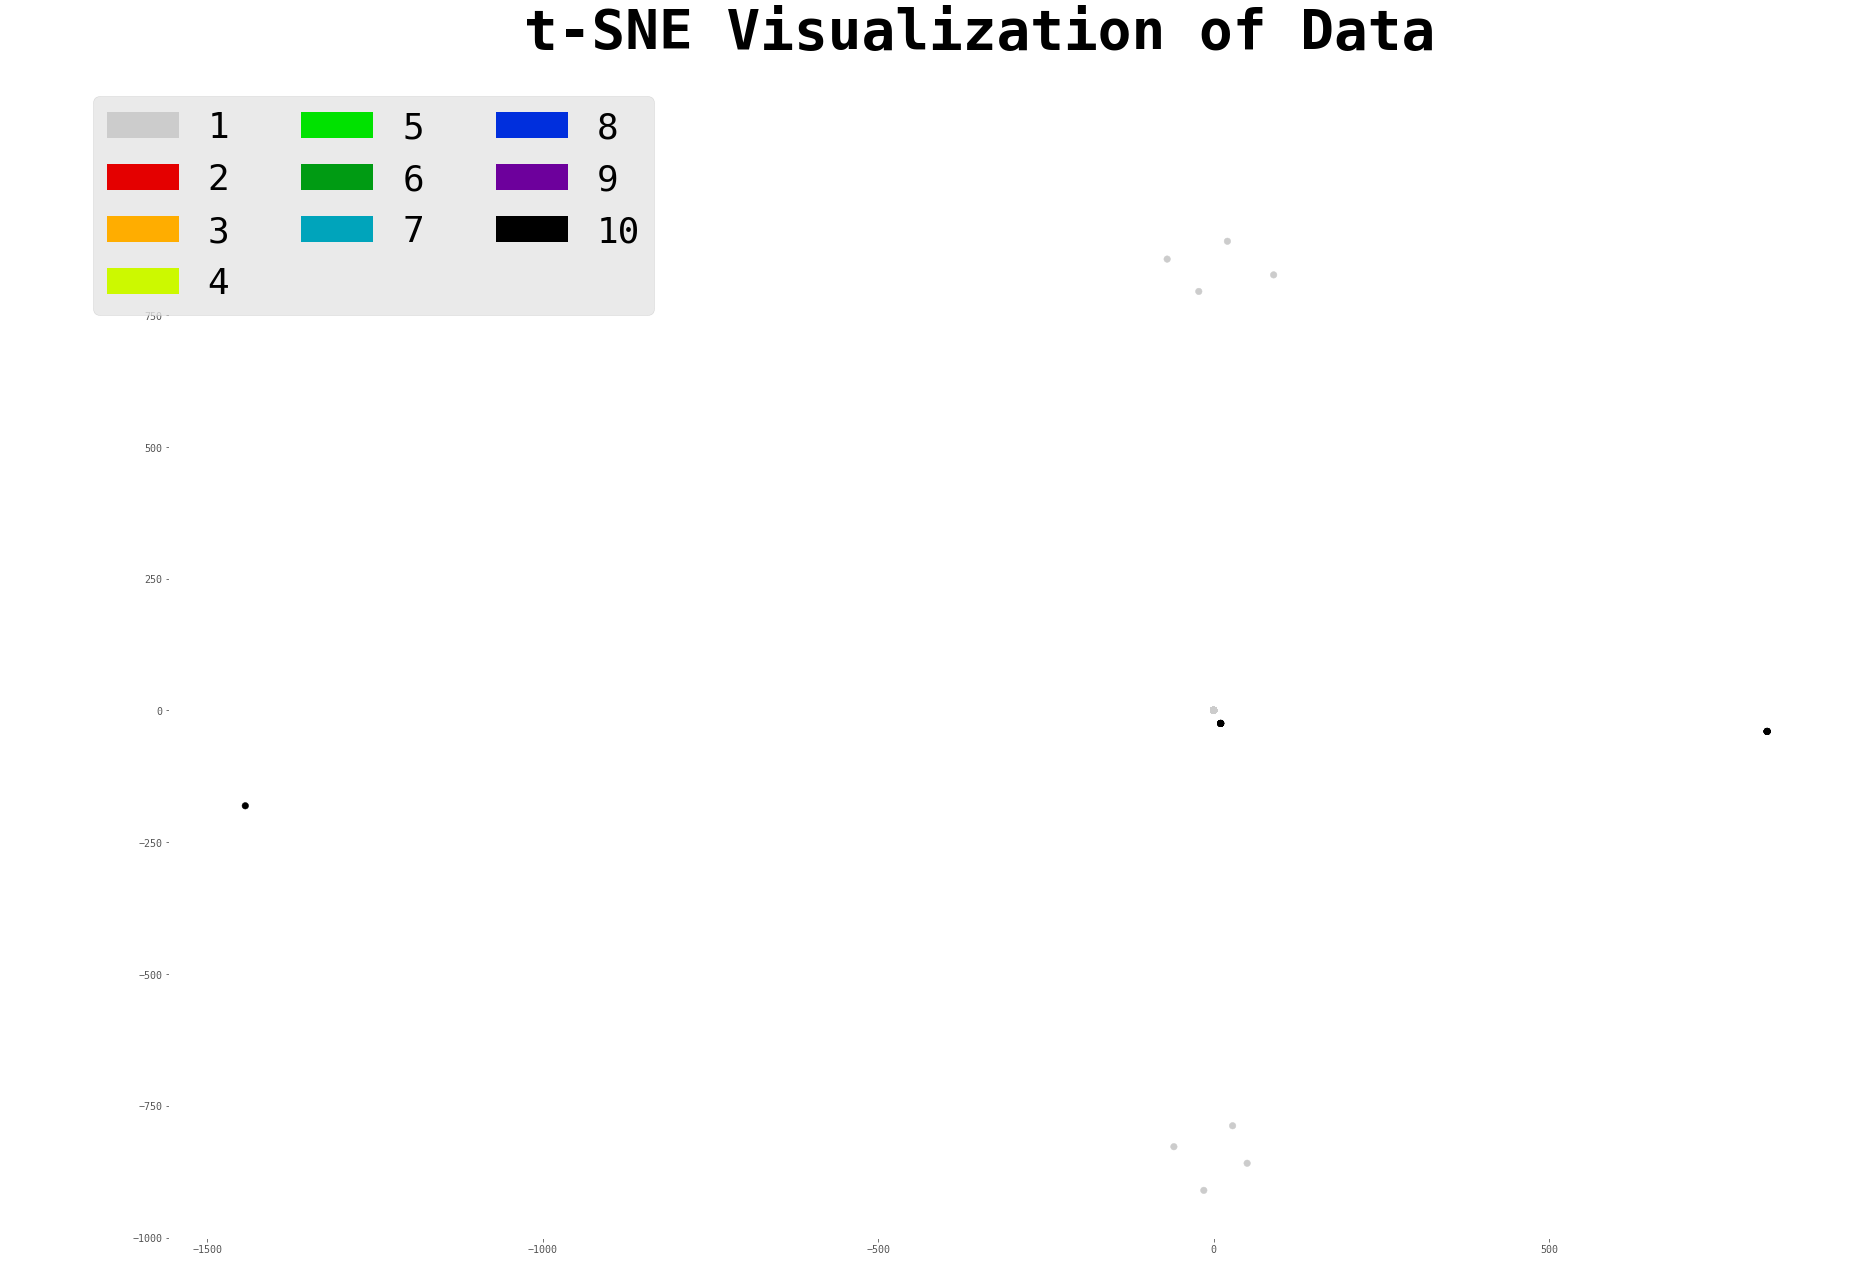

In [16]:
PERPLEXITY = 2.0
cluster.tSNE(kmeans_embedding, PERPLEXITY, n_TOPICS, title = \
              't-SNE Visualization of Data')

## Compute Inertia to Determine Optimal Clusters

/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  model.fit(vectors)
/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  model.fit(vectors)
/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  model.fit(vectors)
/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  model.fit(vectors)
/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/clustering.py:122: Converg

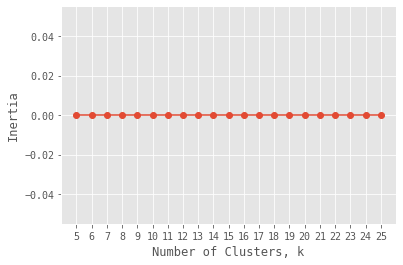

In [17]:
LOOPS = 5
n_TOPICS_START = 5
n_TOPICS_END = 25
cluster.optimalClustersKMeans(tfidf, LOOPS, n_TOPICS_START, n_TOPICS_END)